# Lab VI Daniel Chaves

Data preparation

In [1]:
import pandas as pd
import numpy as np
#upload the dataset by downloading both datasets from canvas and upload it on colab
data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")

# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])
# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)
# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])
# Define the total number of 5-minute intervals in a day
nintvals = 288

In [2]:
# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)
# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])
    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])
        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]
# Print the resulting 'vectorized_day_dataset' and the size of vector
print(vectorized_day_dataset)
print(vectorized_day_dataset.shape)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]
(365, 288)


In [3]:
# print the number of days with missing value
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value:',np.size(np.where(nans_per_day > 0),1))

number of days with missing value: 28


In [4]:
# Drop the days with missing valus
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
# days_not_nans = days[np.where(nans_per_day == 0)[0]]
print(vectorized_day_dataset_no_nans.shape)

(337, 288)


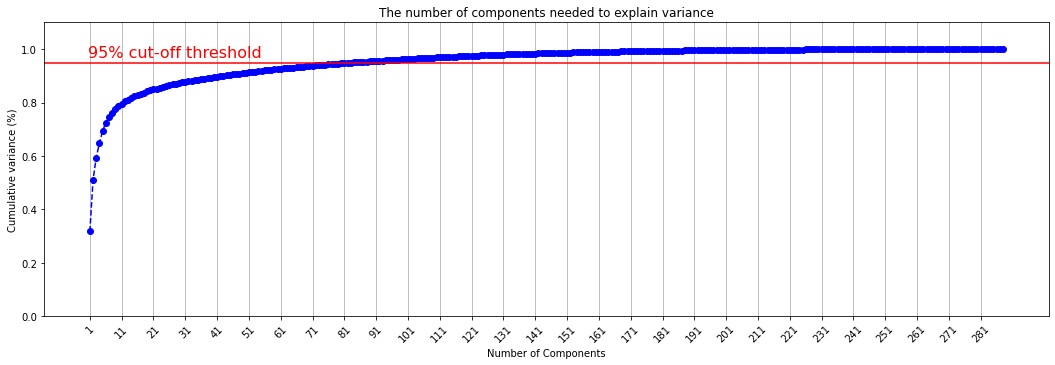

In [37]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


da = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
data = scaler.fit_transform(da)
pca = PCA().fit(data)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)

fig, ax = plt.subplots()
xi = np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1)  # Adjust the range based on the number of components
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(xi[::10])  # Display every 10th component label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.97, '95% cut-off threshold', color='red', fontsize=16)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.subplots_adjust(bottom=0.2)  # Adjust the position of the x-axis labels


plt.grid(axis='x')
plt.show()

PCA and Kernel PCA performing

Text(0.5, 1.0, 'Kernel PCA (Polynomial)')

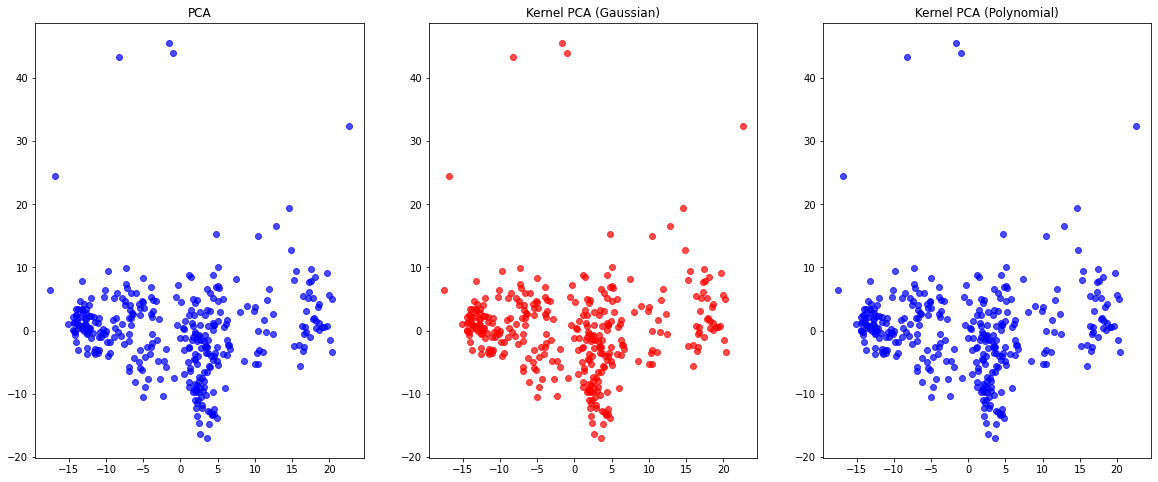

In [36]:
# Import necessary libraries
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_blobs


# Assuming you have your dataset loaded as 'data'
# If not, replace this with loading your actual dataset

da = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
data = scaler.fit_transform(da)

# Step 1: Perform PCA for dimensionality reduction
pca = PCA(n_components=10)  # Set the desired number of components
pca_result = pca.fit_transform(data)

# Step 2: Perform Kernel PCA with different kernel functions
# kernel functions : 'linear', 'rbf', 'poly', 'sigmoid'

kernel_pca_gaussian = KernelPCA(kernel='linear', n_components=10,gamma=0.0050)  # Gaussian kernel
kernel_pca_polynomial = KernelPCA(kernel='linear', n_components=10)  # Polynomial kernel

kpca_gaussian_result = kernel_pca_gaussian.fit_transform(data)
kpca_polynomial_result = kernel_pca_polynomial.fit_transform(data)

# Step 3: Pick the best kernel function based on your assessment
# You may evaluate the results using some metric or visual inspection

# For example, you can visualize the results
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='b', marker='o', alpha=0.7)
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(kpca_gaussian_result[:, 0], kpca_gaussian_result[:, 1], c='r', marker='o', alpha=0.7)
plt.title('Kernel PCA (Gaussian)')

plt.subplot(1, 3, 3)
plt.scatter(kpca_polynomial_result[:, 0], kpca_polynomial_result[:, 1], c='b', marker='o', alpha=0.7)
plt.title('Kernel PCA (Polynomial)')

# Note: You might need to fine-tune parameters for the kernel functions (e.g., gamma for the Gaussian kernel) based on your specific dataset.


In [38]:
from sklearn.decomposition import PCA


# Define the number of iterations for stability analysis
num_iterations = 4

# Define the proportion of data to use in each iteration (e.g., 80%)
prop_data_used = 0.8

# Initialize an array to store the principal component scores
all_pc_scores = []

# Perform PCA on different random subsets of the data
for _ in range(num_iterations):
    # Randomly select a subset of the data
    subset_indices = np.random.choice(data.shape[0], size=int(prop_data_used * data.shape[0]), replace=False)
    subset_data = data[subset_indices]
    
    # Fit PCA on the subset
    pca = PCA(n_components=10)
    pca.fit(subset_data)
    
    # Get the principal component scores for the entire dataset
    pc_scores = pca.transform(data)
    all_pc_scores.append(pc_scores)

# Calculate the mean and standard deviation of the principal component scores
mean_scores = np.mean(all_pc_scores, axis=0)
std_scores = np.std(all_pc_scores, axis=0)

# You can use 'mean_scores' and 'std_scores' for further analysis or visualization

In [39]:
all_pc_scores

[array([[21.88489575, 33.95349873, -7.87148704, ..., 10.35169964,
         12.30916521,  6.71237442],
        [16.79904152,  6.34943105,  3.74549125, ..., -2.09380513,
         -4.56568071, -1.770328  ],
        [17.68851551,  8.92794633,  1.48609412, ..., -0.24868863,
         -1.87597027, -1.55236687],
        ...,
        [ 3.36620047, -2.4157308 ,  0.87603048, ...,  1.28444503,
         -1.82215127, -1.05563334],
        [ 4.21051119,  0.18483844, -0.81605986, ...,  0.88405048,
         -0.98626885, -1.1925226 ],
        [11.81694372, 16.63552273,  5.98879023, ..., -5.64195986,
         -2.46731103, -1.11352401]]),
 array([[ 2.34234816e+01,  3.10351701e+01, -1.37499436e+01, ...,
          1.37595643e+01,  6.33990184e+00,  5.04269009e+00],
        [ 1.71110340e+01,  5.17032878e+00,  3.01679779e+00, ...,
         -2.71458630e+00, -1.16381277e+00, -2.20149213e+00],
        [ 1.80446257e+01,  7.49649956e+00,  2.84989702e-02, ...,
         -3.66247830e-01, -1.16050287e+00, -8.69731021e-

In [41]:
from sklearn.decomposition import PCA


# Define the number of iterations for stability analysis
num_iterations = 100

# Define the proportion of data to use in each iteration (e.g., 80%)
prop_data_used = 0.8

# Initialize an array to store the principal component scores
all_pc_scores = []

# Perform PCA on different random subsets of the data
for _ in range(num_iterations):
    # Randomly select a subset of the data
    subset_indices = np.random.choice(data.shape[0], size=int(prop_data_used * data.shape[0]), replace=False)
    subset_data = data[subset_indices]
    
    # Fit PCA on the subset
    pca = PCA(n_components=10)
    pca.fit(subset_data)
    
    # Get the principal component scores for the entire dataset
    pc_scores = pca.transform(data)
    all_pc_scores.append(pc_scores)

# Calculate the stability index
def stability_index(scores, threshold=0.6):
    """
    Calculate the stability index based on the proportion of variance explained.
    
    Args:
        scores (array): Array of principal component scores.
        threshold (float): Threshold for the proportion of variance explained.
        
    Returns:
        stability_index (float): Stability index.
    """
    total_variance = np.var(scores, axis=0).sum()
    explained_variance = np.var(scores, axis=0)
    prop_var_explained = explained_variance / total_variance
    return np.mean(prop_var_explained > threshold)

# Calculate the stability index for principal component scores
stability_idx = stability_index(np.array(all_pc_scores))

print(f"Stability Index: {stability_idx}")


Stability Index: 0.0


In [42]:
pc_scores

array([[21.62691296, 34.83144903, -9.26999434, ...,  9.82749186,
         9.36345695,  8.19323243],
       [16.99617115,  6.7679215 ,  3.88354061, ..., -1.80396892,
        -3.85997604, -2.04250884],
       [17.76050065,  9.34598267,  1.7053142 , ...,  0.03881605,
        -1.57014652, -1.5623043 ],
       ...,
       [ 3.73819786, -2.23775912,  0.98737862, ...,  1.28824218,
        -1.95015879, -0.70509978],
       [ 4.58725129,  0.44934387, -1.0600821 , ...,  1.24018123,
        -1.24465151, -0.94070342],
       [12.22714776, 16.84472946,  6.58363122, ..., -4.69220979,
        -1.02576635, -2.15187563]])

In [43]:
all_pc_scores

[array([[ 18.87894075,  32.48426516, -12.43757035, ...,  -1.88601258,
           5.81567913,  21.63139351],
        [ 16.25176354,   7.87278382,   2.75060947, ...,  -0.40251932,
          -1.95811036,  -3.36418556],
        [ 16.81742124,  10.02960667,   0.35375571, ...,  -0.72394721,
          -0.09262272,  -0.72972451],
        ...,
        [  3.332095  ,  -2.05189148,   0.89564628, ...,  -1.9170567 ,
          -0.12504535,  -1.24970967],
        [  4.07769954,   0.50290664,  -1.19049074, ...,  -1.11353594,
           0.39001735,  -1.09830736],
        [ 10.6377207 ,  18.21012512,   4.18726264, ...,   3.71940478,
          -1.74542874,  -3.20578916]]),
 array([[22.86059799, 34.02474312, -8.29785741, ..., 14.2605185 ,
          7.07573   , -4.71530338],
        [17.48134796,  5.9652503 ,  4.688639  , ..., -3.56190367,
         -2.44500222, -0.20236545],
        [18.38999714,  8.55182037,  2.00004735, ..., -1.13636879,
         -0.8992338 ,  0.36872151],
        ...,
        [ 3.816975

Stability index using cosine similarity

In [44]:
data

# Define the number of iterations for stability analysis
num_iterations = 100

# Initialize an array to store the first two principal components
all_pc_components = []

# Perform PCA on different random subsets of the data
for _ in range(num_iterations):
    # Randomly select a subset of the data
    subset_indices = np.random.choice(data.shape[0], size=data.shape[0], replace=True)
    subset_data = data[subset_indices]
    
    # Fit PCA on the subset
    pca = PCA(n_components=2)
    pca.fit(subset_data)
    
    # Get the first two principal components and store them
    pc_components = pca.components_
    all_pc_components.append(pc_components)

# Calculate the stability index based on cosine similarity
def stability_index(components):
    """
    Calculate the stability index based on cosine similarity between PC components.
    
    Args:
        components (array): Array of PCA components.
        
    Returns:
        stability_index (float): Stability index.
    """
    num_components = len(components)
    similarities = np.zeros((num_components, num_components))
    
    for i in range(num_components):
        for j in range(num_components):
            if i != j:
                # Calculate cosine similarity between component vectors
                similarity = np.abs(np.dot(components[i].ravel(), components[j].ravel()) / (np.linalg.norm(components[i]) * np.linalg.norm(components[j])))
                similarities[i, j] = similarity
    
    # Calculate the mean cosine similarity
    stability = np.mean(similarities)
    return stability

# Calculate the stability index for principal component vectors
stability_idx = stability_index(all_pc_components)
print(f"Stability Index: {stability_idx}")


Stability Index: 0.8794457270428345


In [45]:
data

# Define the number of iterations for stability analysis
num_iterations = 100

# Initialize an array to store the first two principal components
all_pc_components = []

# Perform PCA on different random subsets of the data
for _ in range(num_iterations):
    # Randomly select a subset of the data
    subset_indices = np.random.choice(data.shape[0], size=data.shape[0], replace=True)
    subset_data = data[subset_indices]
    
    # Fit PCA on the subset
    pca = PCA(n_components=2)
    pca.fit(subset_data)
    
    # Get the first two principal components and store them
    pc_components = pca.components_
    all_pc_components.append(pc_components)

# Calculate the stability index based on Euclidean distance
def stability_index(components):
    """
    Calculate the stability index based on Euclidean distance between PC components.
    
    Args:
        components (array): Array of PCA components.
        
    Returns:
        stability_index (float): Stability index.
    """
    num_components = len(components)
    distances = np.zeros((num_components, num_components))
    
    for i in range(num_components):
        for j in range(num_components):
            if i != j:
                # Calculate Euclidean distance between component vectors
                distance = np.linalg.norm(components[i] - components[j])
                distances[i, j] = distance
    
    # Calculate the mean Euclidean distance
    stability = np.mean(distances)
    return stability

# Calculate the stability index for principal component vectors
stability_idx = stability_index(all_pc_components)
print(f"Stability Index: {stability_idx}")

Stability Index: 0.5474473711199179
